In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,NaN,3.815600,1.746400
1,-0.098505,NaN,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,NaN
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,NaN
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,NaN
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,NaN,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	53
float64		column 2	52
float64		column 3	13
float64		column 4	39
float64		column 5	26
float64		column 6	0
float64		column 7	26
float64		column 8	52
float64		column 9	40
float64		column 10	91
float64		column 11	13
float64		column 12	66


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,747.000000,748.000000,787.000000,761.000000,774.000000,800.000000,774.000000,748.000000,760.000000,709.000000,787.000000,734.000000
mean,1.475114,1.242247,1.984623,1.929217,1.989291,2.004984,1.958326,1.991592,2.002400,1.955718,1.949370,1.971088
std,2.723209,3.611227,1.142103,1.148864,1.161126,1.143051,1.161920,1.124317,1.134652,1.137702,1.178049,1.102345
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.414930,-0.695220,1.025950,0.934780,0.984783,0.988268,0.957522,1.000167,1.069775,1.007800,0.887790,1.039350
50%,0.675880,0.564195,1.968700,1.899600,2.027350,2.006650,1.972050,2.003100,1.997350,1.970500,1.912900,1.956850
75%,3.965000,4.422525,2.925850,2.922100,2.946975,3.013700,2.961175,2.882725,2.988050,2.913800,3.016700,2.855825
max,6.982200,8.018800,3.984100,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

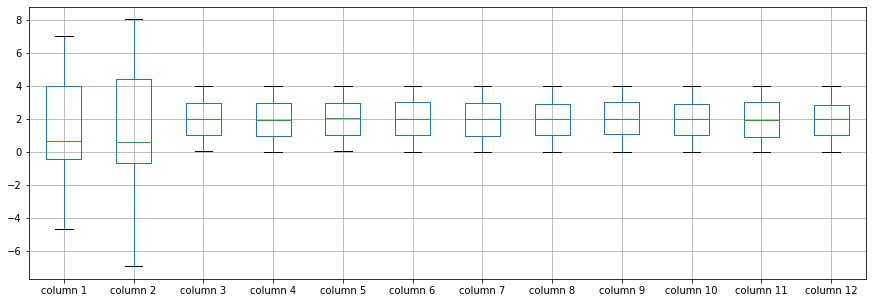

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.475114
column 2     1.242247
column 3     1.984623
column 4     1.929217
column 5     1.989291
column 6     2.004984
column 7     1.958326
column 8     1.991592
column 9     2.002400
column 10    1.955718
column 11    1.949370
column 12    1.971088
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.426687,-0.029573,-0.001110,0.017554,0.026346,-0.010799,0.020805,0.005044,-0.002584,-0.000203,0.015516
column 2,-0.426687,1.000000,-0.005314,-0.047941,-0.024736,0.002499,0.025560,-0.044162,-0.015325,-0.054034,-0.082069,-0.000089
column 3,-0.029573,-0.005314,1.000000,-0.024156,0.074080,0.011095,0.033281,-0.012242,-0.012486,-0.003710,-0.038593,0.020480
column 4,-0.001110,-0.047941,-0.024156,1.000000,0.018951,-0.043179,0.034903,0.039448,-0.025032,0.054333,0.036528,-0.003172
column 5,0.017554,-0.024736,0.074080,0.018951,1.000000,0.036923,0.008259,0.008142,0.004865,-0.021696,-0.000552,0.016409
column 6,0.026346,0.002499,0.011095,-0.043179,0.036923,1.000000,-0.083174,0.037455,0.035090,-0.000988,-0.032321,-0.019583
column 7,-0.010799,0.025560,0.033281,0.034903,0.008259,-0.083174,1.000000,-0.044364,-0.018549,-0.036140,-0.030546,-0.010631
column 8,0.020805,-0.044162,-0.012242,0.039448,0.008142,0.037455,-0.044364,1.000000,-0.060834,-0.042333,-0.028953,-0.069996
column 9,0.005044,-0.015325,-0.012486,-0.025032,0.004865,0.035090,-0.018549,-0.060834,1.000000,0.041558,-0.013236,-0.034913
column 10,-0.002584,-0.054034,-0.003710,0.054333,-0.021696,-0.000988,-0.036140,-0.042333,0.041558,1.000000,-0.084487,0.053542


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+85,12+85+85,12+85+85,12+85+85+85+85,12+85+85+85,12+85+85,12+85,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.932089958190918
Epoch: 1 , loss: 27.515532188415527
Epoch: 2 , loss: 25.007877388000487
Epoch: 3 , loss: 22.82281764984131
Epoch: 4 , loss: 21.989286880493164
Epoch: 5 , loss: 21.61826187133789
Epoch: 6 , loss: 21.11706413269043
Epoch: 7 , loss: 20.853873023986818
Epoch: 8 , loss: 20.460368347167968
Epoch: 9 , loss: 20.074344596862794
Epoch: 10 , loss: 19.89041358947754
Epoch: 11 , loss: 19.84339569091797
Epoch: 12 , loss: 19.629615783691406
Epoch: 13 , loss: 19.56387222290039
Epoch: 14 , loss: 19.285675773620607
Epoch: 15 , loss: 19.122477989196778
Epoch: 16 , loss: 19.14991382598877
Epoch: 17 , loss: 19.064095726013182
Epoch: 18 , loss: 18.916592025756835
Epoch: 19 , loss: 18.915558738708498
Epoch: 20 , loss: 18.7813094329834
Epoch: 21 , loss: 18.71103733062744
Epoch: 22 , loss: 18.74365324020386
Epoch: 23 , loss: 18.77765327453613
Epoch: 24 , loss: 18.68749454498291
Epoch: 25 , loss: 18.636335906

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    1.772858
column 11    1.731058
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.382801,0.0,0.000000
1,0.0,0.794433,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.426007
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,-0.061080
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,-0.934167
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
796,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
797,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.537380
798,0.0,0.000000,0.0,0.0,0.0,0.0,-0.097259,0.0,0.0,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(47.295876601272646, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.19053861071876615

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.53370,0.469590,0.67908,3.434400,2.79240,2.77630,1.316299,3.815600,1.746400
1,-0.098505,0.615863,2.062800,2.92160,0.424720,1.17850,1.680200,1.38880,3.21670,2.923600,0.772910,1.067457
2,-0.169460,0.501530,2.470900,3.06500,1.567600,1.48240,0.921600,2.64240,1.51870,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.95630,2.787000,2.59570,2.893300,1.53750,0.99942,3.659300,0.618250,3.204720
4,0.098830,0.234180,0.429700,1.63120,3.554100,2.27110,0.374250,2.17860,1.31400,1.063200,1.026900,1.254233
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.55612,0.070769,2.07470,0.803040,3.22290,3.49330,1.325500,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.34610,1.377300,2.28870,0.396130,2.39610,2.46350,1.667500,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.26460,3.341200,1.53700,1.225600,0.74027,2.49540,1.343300,1.622500,2.122680
798,3.441400,-5.216300,1.577000,1.84400,1.098700,3.42430,0.713551,3.72700,1.18790,0.951120,1.884500,1.143700


In [21]:
imputations[-1].to_excel("4-gauss_NE_5(imp).xlsx", index=False, header=False)